In [256]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [257]:
reward_matrix = np.genfromtxt('DataTugas3ML2019.txt', delimiter='\t')
reward_matrix = np.asarray(reward_matrix)
q_table = pd.DataFrame(np.zeros((4, 225)))

In [314]:
class q_learning:        
    
    actions = np.array(['N', 'S', 'W', 'E'])
    list_reward = []  
    list_step = [] 
    
    def get_possible_actions(current_state, reward_matrix, possible_actions):

        nrows, ncols = reward_matrix.shape
        x, y = current_state    

        if y==ncols-1 or reward_matrix[x, y+1]==0:
            possible_actions = np.setdiff1d(possible_actions, 'E')
        if y==0 or reward_matrix[x, y-1]==0:
            possible_actions = np.setdiff1d(possible_actions, 'W')
        if x==0 or reward_matrix[x-1, y]==0:
            possible_actions = np.setdiff1d(possible_actions, 'N')
        if x==nrows-1 or reward_matrix[x+1, y]==0:
            possible_actions = np.setdiff1d(possible_actions, 'S')

        return possible_actions
    
    def move(current_state, action):
        next_state_x, next_state_y = current_state

        if action=='N':
            if next_state_x > 0:
                next_state_x -=1
        elif action=='S':
            if next_state_x < 14:
                next_state_x +=1
        elif action=='W':
            if next_state_y < 0:
                next_state_y -=1
        elif action=='E':
            if next_state_y < 14:
                next_state_y +=1
        print(next_state_x, next_state_y)

        return next_state_x, next_state_y
    
    def train(episode, reward_matrix, q, gamma = 0.7, alpha = 0.25):
        for i in range(0, episode):
            current_state = 14,0
            reward = 0
            step = []
            while (reward_matrix[current_state] != 500):

                new_state = current_state

                directions = get_possible_actions(new_state, reward_matrix, actions)

                x = random.choice(directions)
                new_state = move(current_state, x)
                step.append(x)

                arah = np.where(actions == x)[0][0]
                state = current_state[0]*15 + current_state[1]
                next_state = new_state[0]*15 + new_state[1]

                check_max = [q[next_state][0], q[next_state][1], q[next_state][2], q[next_state][3]]

                q[state][arah] = q[state][arah] + alpha * (r[new_state] + (gamma * (max(check_max) - q[state][arah])))
                reward = reward + r[new_state]

                current_state = new_state 

            list_step.append(step)
            list_reward.append(reward)
    
    def show(reward_matrix,q):
        road = reward_matrix * 0
        current_state = 14,0
        reward = 0

        road[current_state] = 1
        step = []

        while (reward_matrix[current_state] != 500): 
            possible_dir = []
            state = current_state[0]*15 + current_state[1]

            idx = [q[state][0], q[state][1], q[state][2], q[state][3]]
            max_q = idx.index(max(idx))
            

            step.append(actions[max_q])

            new_state = move(current_state, actions[max_q])

            road[new_state] = 1

            reward = reward + reward_matrix[new_state]
            current_state = new_state
        return reward, road, step

In [315]:
q = q_learning

In [316]:
q.train(500,reward_matrix,q_table)

Step :  ['E', 'E', 'N', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'N', 'E', 'E', 'N', 'E', 'N', 'E', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N']
Reward :  443.0


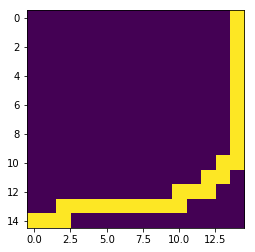

In [318]:
reward, road, step = q.show(reward_matrix,q_table)
plt.imshow(road)
plt.show
print("Step : ", step)
print("Reward : ", reward)